### Import Examples for Quant Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

## Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

### Feature Engineering Example

But why work with returns when we already have the prices?  
The reason is that prices are usually non-stationary, that is when statistics such as mean and variance (mathematical moments) change over time.

In [ ]:
# create simple and log returns, multiplied by 100 for convenience
df['simple_rtn'] = 100 * df.adj_close.pct_change()
df['log_rtn'] = 100 * (np.log(df.adj_close) - np.log(df.adj_close.shift(1)))

### Importance of Data/Feature Engineering  

Different types of data for different ml algos  
* Decision Trees: split at threshold of feature, createing multiple nested 'if' statements as rules
* Neural Network: adjusts weights fo feature and combination of features, creating a matrix for predictions  

Normalize, Scale and Center Data  
* Normalize: take from absolute to relative values  
        * The opening price was $20 below yesterday's closing price (not normalized)  
        Most of time use Mean: 0 and Variance: 1  
        Other times want the variables bound between 0 and 1  
        * The opening price was 2% bellow yesterday's closing price (normalized)  
* Scale: adjust distribution/range of feature to a standard size (needed for NNets not DTrees)
        * Can use quantiles to more robustly account for outliers
* Center: adjust mean of feature to 0 (needed for NNets, not DTrees)  
* Feature Engineering: NNets can engineer features (combine weights from different features), DTrees cannot create new features, just organize different rules based on sets of features(features dependent on each others

### Plotly Candlestick Example

In [ ]:
fig = px.line(time_outside_nat, x='date', y='Avg Time Away', title='Change in Time Outside Home')
fig.update_xaxes(title_text='Date', nticks=16)
fig.update_yaxes(title_text='Time Outside Home')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=outside_view.date, y=outside_view.loc[:,'AZ Avg Time Away'], name='AZ Avg Time Away', line=dict(width=4)))
fig.add_trace(go.Scatter(x=outside_view.date, y=outside_view.loc[:,'CO Avg Time Away'], name='CO Avg Time Away', line=dict(width=4)))
fig.add_trace(go.Scatter(x=outside_view.date, y=outside_view.loc[:,'NAT Avg Time Away'], name='NAT Avg Time Away', line=dict(width=4)))

fig.add_trace(go.Scatter(x=cov_az.date, y=(cov_az.loc[:,'new_case_rate']/500), name='AZ New Covid Case Rate', line=dict(dash='dash', color='blue')))
fig.add_trace(go.Scatter(x=cov_co.date, y=(cov_co.loc[:,'new_case_rate']/500), name='CO New Covid Case Rate', line=dict(dash='dash', color='red')))
fig.add_trace(go.Scatter(x=cov_nat.date, y=(cov_nat.loc[:,'new_case_rate']/500), name='NAT New Covid Case Rate', line=dict(dash='dash', color='green')))
#fig = px.line(covid_co, x='date', y=['new_case_count','death_count'])

fig.update_layout(
        title='Change in Time Outside Home vs New Covid Case Rate',
        xaxis=dict(showline=True, showgrid=False, showticklabels=True), 
        xaxis_title='Date',
        yaxis_title='% Change Relative to January 2020',
        plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.line(time_outside_nat, x='date', y='Avg Time Away', title='Change in Time Outside Home')
fig.update_xaxes(title_text='Date', nticks=16)
fig.update_yaxes(title_text='Time Outside Home')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.bar(ui_pua_view, x='date', y=Pan_Unemploy_Assist, title='Pandemic Unemployment Assistance')
fig.update_xaxes(title_text='Date', nticks=16)
fig.update_yaxes(title_text='Initial Claims')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.area(consum_spend_view, x='date', y=['AZ Consumer Spending', 'CO Consumer Spending', 'National Consumer Spending'], title='Spending Differences After Covid (A.C.)', width=1400, height=500)

fig.update_xaxes(title_text='Date') #labels={'x': 'Date', 'y':'Year Over Year Spending Difference'}
fig.update_yaxes(title_text='Year Over Year Spending Difference')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Middle Band'], line=dict(color='blue', width=0.7), name='Middle Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['Upper Band'], line=dict(color='red', width=1.5), name='Upper Band (Sell)'))
fig.add_trace(go.Scatter(x=df.index, y=df['Lower Band'], line=dict(color='green', width=1.5), name='Lower Band (Buy)'))

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='market data'))

fig.update_layout(title='Bollinger Band Strategy', yaxis_title='Jacobs Engineering Stock Price (USD per Shares)')

fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                        buttons=list([
                                dict(count=1, label='1m', step='month', stepmode='backward'),
                                dict(count=6, label='6m', step='month', stepmode='backward'),
                                dict(count=1, label='YTD', step='year', stepmode='todate'),
                                dict(count=1, label='1y', step='year', stepmode='backward'),
                                dict(step='all')
                                    ])
                                    )
                )

fig.show()

# Imports

In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import investpy as ipy
import datetime as dt
import requests

import plotly.io as pio
pio.templates

import plotly as py
import plotly.io as pio
pio.templates
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.offline.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split

In [4]:
# How far back can we get bitcoin data?
# dataframe = yf.download(tickers='AAPL', period='max', interval='1d')
# dataframe = yf.download(tickers='AAPL', start='2021-07-01', end='2021-07-08')

In [25]:
today = dt.date.today()

# dd/mm/YY
today_proper = today.strftime("%d/%m/%Y")

data = ipy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2013', to_date='30/06/2020')
holdout_data =  ipy.get_crypto_historical_data(crypto='bitcoin', from_date='01/07/2021', to_date=today_proper)

In [26]:
data.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2013-01-01,13.5,13.6,13.2,13.3,28406,USD
2013-01-02,13.3,13.4,13.2,13.3,17967,USD
2013-01-03,13.3,13.5,13.3,13.4,18032,USD
2013-01-04,13.4,13.5,13.3,13.5,29642,USD
2013-01-05,13.5,13.6,13.3,13.4,21330,USD


In [27]:
holdout_data.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-07-01,35030.7,35032.7,32839.2,33543.6,27412,USD
2021-07-02,33542.2,33925.9,32734.6,33813.4,78929,USD
2021-07-03,33814.2,34909.8,33363.3,34742.8,55693,USD
2021-07-04,34742.8,35957.6,34740.1,35298.2,56133,USD
2021-07-05,35297.0,35300.5,33164.1,33687.8,88355,USD


# EDA

In [64]:
dataframe = pd.DataFrame(data['Close'])
dataframe['Simple Return'] = 100 * dataframe.Close.pct_change()
dataframe['Log Return'] = 100 * (np.log(dataframe.Close) - np.log(dataframe.Close.shift(1)))

dataframe.head()

,Close,Simple Return,Log Return
Date,,,
2013-01-01,13.3,NaN,NaN
2013-01-02,13.3,0.000000,0.000000
2013-01-03,13.4,0.751880,0.749067
2013-01-04,13.5,0.746269,0.743498
2013-01-05,13.4,-0.740741,-0.743498


In [65]:
dataframe.isna().any()

Close            False
Simple Return     True
Log Return        True
dtype: bool

In [66]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2738 entries, 2013-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          2738 non-null   float64
 1   Simple Return  2737 non-null   float64
 2   Log Return     2737 non-null   float64
dtypes: float64(3)
memory usage: 85.6 KB


A logarithmic, or log, scale gives equal visual weight to equal relative changes: a 10% move looks the same whether it is from a high or a low base. The result is that the magnitudes of earlier and later booms and busts can be compared on a level playing field.  

Additionally, a series experiencing exponential growth appears as straight lines, making charts easier to interpret. With a logarithmic scale a constant percentage change is seen as a constant vertical distance so a constant growth rate is seen as a straight line.  

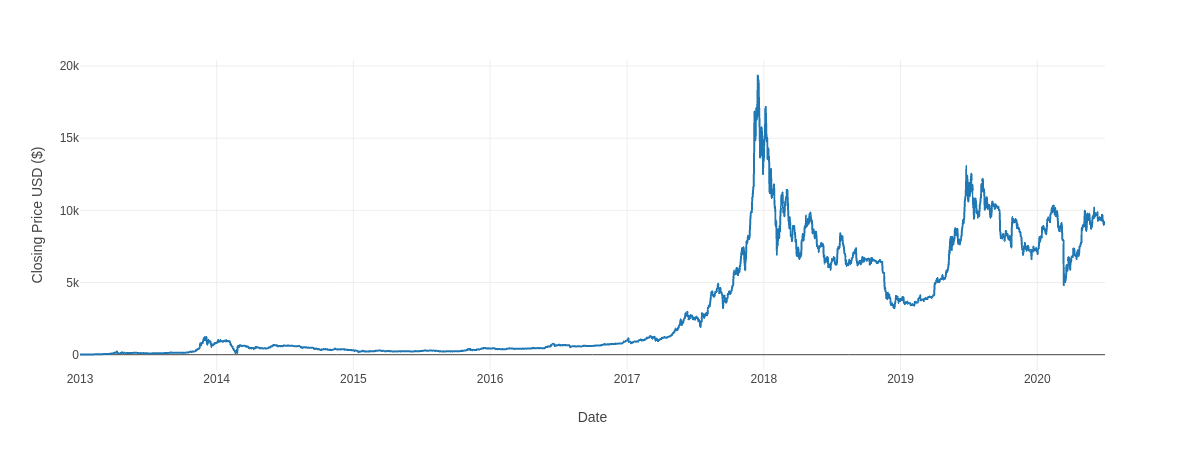

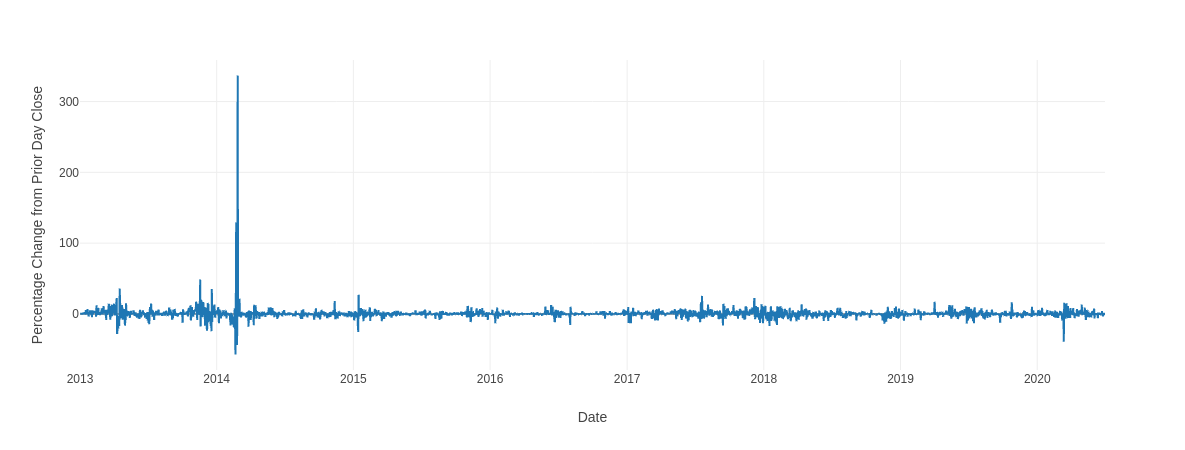

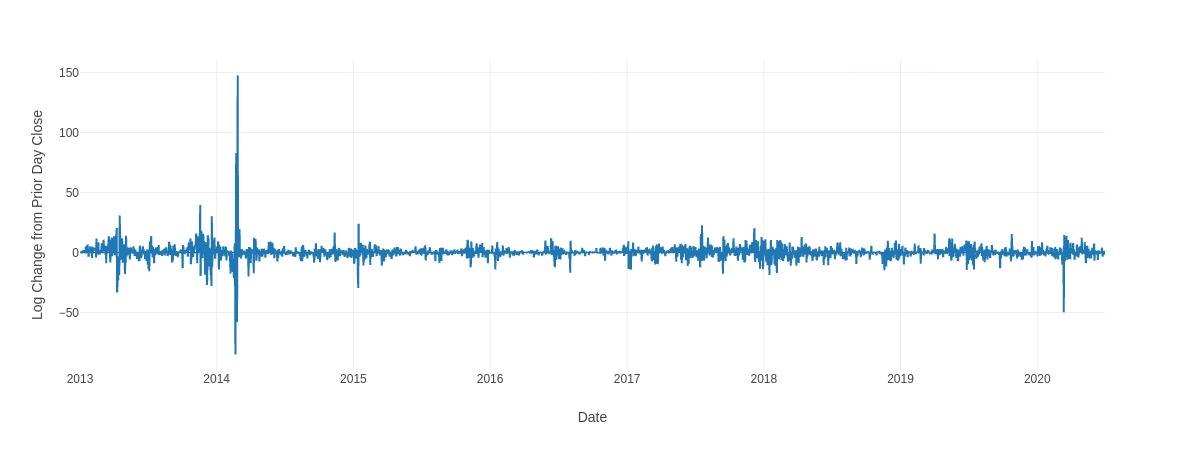

In [81]:
for column in dataframe.columns:
    
    title = 'Bitcoin Closing Price Representations'
    
    titles = {
        'Close': 'Closing Price USD ($)',
        'Simple Return': 'Percentage Change from Prior Day Close',
        'Log Return': 'Log Change from Prior Day Close'
    }
   
    fig = px.line(dataframe, x=dataframe.index, y=dataframe[column], template='none')
    fig.update_yaxes(title_text=titles[column])
    
    fig.show()

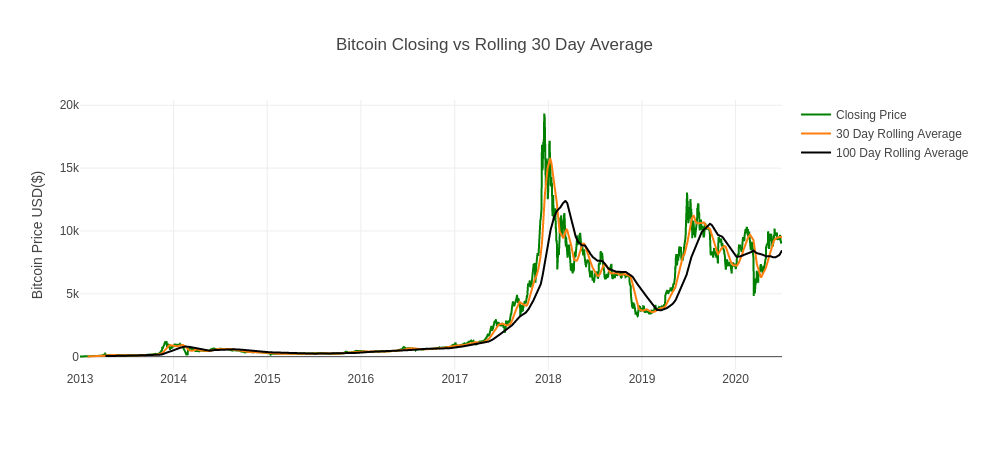

In [58]:
rolling_30 = dataframe['Close'].rolling(window=30).mean()
rolling_100 = dataframe['Close'].rolling(window=100).mean()

fig = go.Figure()

fig.add_trace(go.Line(x=dataframe.index, y=dataframe.Close, line=dict(color='green'), name='Closing Price'))
fig.add_trace(go.Line(x=dataframe.index, y=rolling_30, name='30 Day Rolling Average'))
fig.add_trace(go.Line(x=dataframe.index, y=rolling_100, line=dict(color='black'), name='100 Day Rolling Average'))

fig.update_layout(title='Bitcoin Closing vs Rolling 30 Day Average', yaxis_title='Bitcoin Price USD($)', template='none')

# Data Processing

In [22]:
dataframe = pd.DataFrame(data['Close'])
dataframe.head()

,Close
Date,
2013-01-01,13.3
2013-01-02,13.3
2013-01-03,13.4
2013-01-04,13.5
2013-01-05,13.4


In [ ]:
X_train = []
y_train = []

# need to code this out

In [ ]:
X_train = []
y_train = []

for i in range(60, 2035):
    
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Baseline Model

In [13]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy='mean')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split()

In [ ]:
# Need to figure out how to train/test split the data in order to implement Baseline model on data

# Time Series Analysis

# ARIMA

# Regularized Regression

# Logistic Regression

# Decision Tree

# Random Forest

# Random Forest Boosted

# LSTM

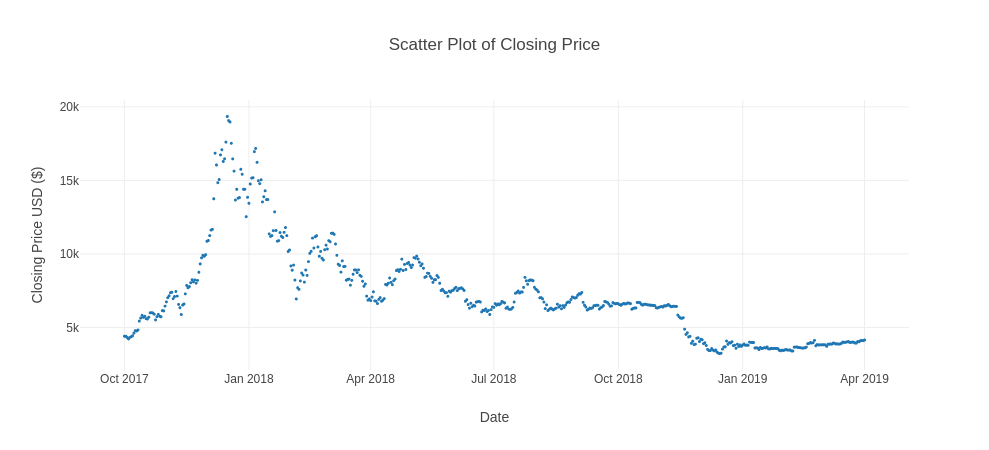

In [56]:
# fig = px.line(time_outside_nat, x='date', y='Avg Time Away', title='Change in Time Outside Home')
# fig.update_xaxes(title_text='Date', nticks=16)
# fig.update_yaxes(title_text='Time Outside Home')
# fig.update_layout(plot_bgcolor='white')
# fig.show()

data_demo = data.loc['10-01-2017':'04-01-2019', :]#[(data.index > '01-01-2017') & (data.index < '01-01-2019')]

fig = px.scatter(data_demo, x=data_demo.index, y=data_demo.Close, title='Scatter Plot of Closing Price', template='none')
fig.update_yaxes(title_text='Closing Price USD ($)')
fig.update_traces(marker=dict(size=3))
fig.show()

# Fast Fourier

# Transformer